In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from skimage.metrics import structural_similarity # helps us to find structural similarity score between the original PAN card and the PAN card user uploaded
import cv2 # computer vision library for all of the image processing requirements
from PIL import Image # required for downloading and visualizing the image
import requests # used to fetch the data from URL's as we're going to take images from different URL's
import imutils # used for drawing contours

C:\Users\osman\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

A subdirectory or file pan_card_tampering already exists.
The syntax of the command is incorrect.


In [4]:
original = Image.open('C:\\Users\\osman\\Desktop\\Personal Files\\system\\AI Projects Working Area\\Projects Folder\\PAN Card Detection Using Computer Vision\\pictures\\original.jpg')
tampered = Image.open('C:\\Users\\osman\\Desktop\\Personal Files\\system\\AI Projects Working Area\\Projects Folder\\PAN Card Detection Using Computer Vision\\pictures\\tampered.png') 

### Loading original and user provided images

In [5]:
## The file format of both image files:
print('original image format: ', original.format)
print('tempered image format: ', tampered.format)

# image size in pixels (width, height):
print('original image size: ', original.size)
print('tempered image size: ', tampered.size)

original image format:  JPEG
tempered image format:  PNG
original image size:  (1200, 800)
tempered image size:  (282, 179)


### converting and resizing both of the images (same size and same format)

In [6]:
# Resizing and saving original image
original = original.resize((250, 160))
print(original.size)
original.save('pan_card_tampering\\image\\original.png') # saves image

# Resizing and saving tampered image
tampered = tampered.resize((250, 160))
print(tampered.size)
tampered.save('pan_card_tampering\\image\\tampered.png') # saves image

(250, 160)
(250, 160)


### displaying original and tampered images

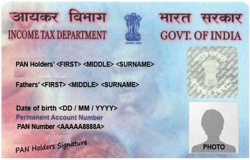

In [7]:
original # displays original image

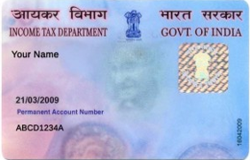

In [8]:
tampered #displays tampered image

### loading original and tampered images using cv2

In [9]:
original = cv2.imread('pan_card_tampering\\image\\original.png')
tampered = cv2.imread('pan_card_tampering\\image\\tampered.png')

### converting the images to grayscale

In [10]:
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

### computing the structural similarity index (SSIM) between the two images

In [11]:
(score, diff) = structural_similarity(original_gray, tampered_gray, full = True)
diff = (diff * 255).astype('uint8')
print('SSIM {}'.format(score))

SSIM 0.31678790332739426


### calculating threshold and contours

In [12]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1] # threshold function to transform grayscale image into a binary image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # finding contours only works on binary image, useful for shape analysis and recognition
cnts = imutils.grab_contours(cnts) # grabs the appropriate value of the contours

### loop over the contours and apply the contours on image

In [22]:
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (255, 0, 0), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (255, 0, 0), 2)

### displaying original image with contour

Original image


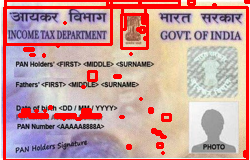

In [26]:
print("Original image")
Image.fromarray(original)

### displaying tampered image with contour

Tampered image


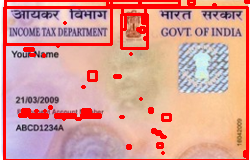

In [27]:
print("Tampered image")
Image.fromarray(tampered)

### displaying difference image with black

Different Image


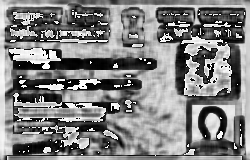

In [29]:
print("Different Image")
Image.fromarray(diff)

### displaying threshold image with white

Threshold image


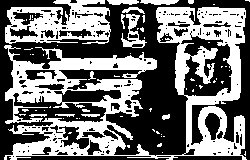

In [30]:
print("Threshold image")
Image.fromarray(thresh)